# Ess 330 Project Final report

Chippy Marx (CSU)  
Chris Drew (CSU)

In [ ]:
library(terra)      

terra 1.8.42

Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks terra::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.8     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.3.0     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ dials::buffer()   masks terra::buffer()
✖ scales::discard() masks purrr::discard()
✖ tidyr::extract()  masks terra::extract()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
✖ recipes::update() masks terra::update(), stats::update()


Attaching package: 'climateR'

The following object is masked from 'package:readr':

    parse_date

The following object is masked from 'package:graphics':

    plot

The following object is masked from 'package:base':

    plot


|---------|---------|---------|---------|
                                          


|---------|---------|---------|---------|
                                          

In [ ]:
# Perform k-means clustering (5 clusters, max 100 iterations)
#k-mean= clustering algorithm used in unpupervised machine learning () to group data points into specified number of clusters, based on similarity.

#smaller k's= simplier intepration, less overfitting, faster computation; but you may miss important sub-group differences 
#larger k's= can revealsubtle patters or subtypes, and better to fit to data; meaning it may reduce within-cluster variance 
# There are several ways to chose the best k-mean, I found a way called the elbow method : 
# Elbow Method: Compute WCSS for k = 1 to 10

#wcss <- numeric(10)

#for (k in 1:10) {
  #set.seed(42)  # For reproducibility
  #km <- kmeans(vs, centers = k, iter.max = 100)
  #wcss[k] <- km$tot.withinss
#}

# Plot the elbow curve
#plot(1:10, wcss, type = "b", pch = 19,
    # xlab = "Number of Clusters (k)",
     #ylab = "Total Within-Cluster Sum of Squares (WCSS)",
     #main = "Elbow Method for Determining Optimal k")

#this shows you the "elbow" point, where increasing the k has diminishing returns

Maybe include (ask Mike)

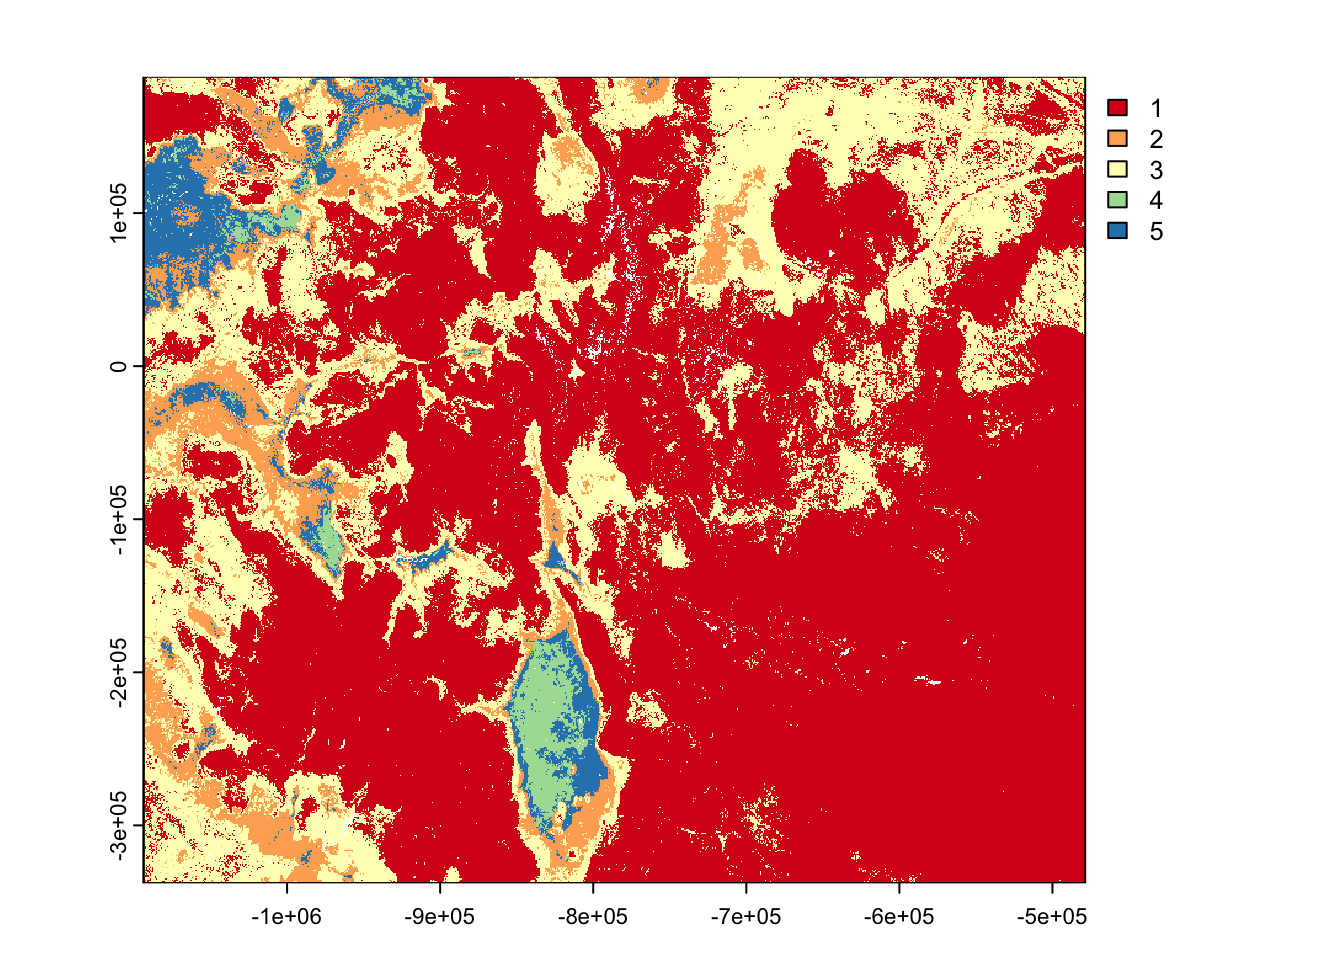

In [ ]:
# 5 is defined by you - no right or wrong answer
# This take a while to run so be sure to run, save, and comment in your code
E <- kmeans(vs, 5, iter.max = 100)

# Create a new raster for cluster results
clus_raster <- r[[1]]
values(clus_raster) <- NA
clus_raster[idx] <- E$cluster
#Purpose: turn the clustering results into spatial raster that matches the original data

# Plot the cluster map
plot(clus_raster, col = RColorBrewer::brewer.pal(5, "Spectral"))

This map shows:

In [ ]:
# Download TerraClim climate data for Colorado (2015–2020 average)
gM = climateR::getTerraClim(co, params, 
                            startDate = "2015-01-01", 
                            endDate   = "2020-12-31") 


# Load field plot data (data from 2007) and join with plot geometries
pts <- inner_join(read_csv("data/CO_INVASIVE_SUBPLOT_SPP.csv"), 
                  read_csv("data/CO_PLOTGEOM.csv"), 
                  by = c("PLT_CN" = 'CN')) %>% 
  st_as_sf(coords = c("LON", 'LAT'), crs = 4326) |> 
  st_transform(crs)

Rows: 3975 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): VEG_FLDSPCD, VEG_SPCD
dbl  (13): CN, PLT_CN, INVYR, STATECD, UNITCD, COUNTYCD, PLOT, SUBP, CONDID,...
lgl   (1): MODIFIED_DATE
dttm  (1): CREATED_DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29168 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): ECOSUBCD, ROADLESSCD, FVS_VARIANT
dbl  (16): CN, STATECD, INVYR, UNITCD, COUNTYCD, PLOT, LAT, LON, CONGCD, HUC...
lgl   (3): FVS_DISTRICT, ECO_UNIT_PNW, PRECIPITATION
dttm  (2): CREATED_DATE, MODIFIED_DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
# -------------------
# Start the modeling workflow
# -------------------

# Split data into training and testing sets, stratified by cluster
xx = read_csv("data/xx.csv") 

Rows: 3965 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): ID, sl_forb_current, sl_grass_current, sl_forb_mid_585, sl_grass_m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

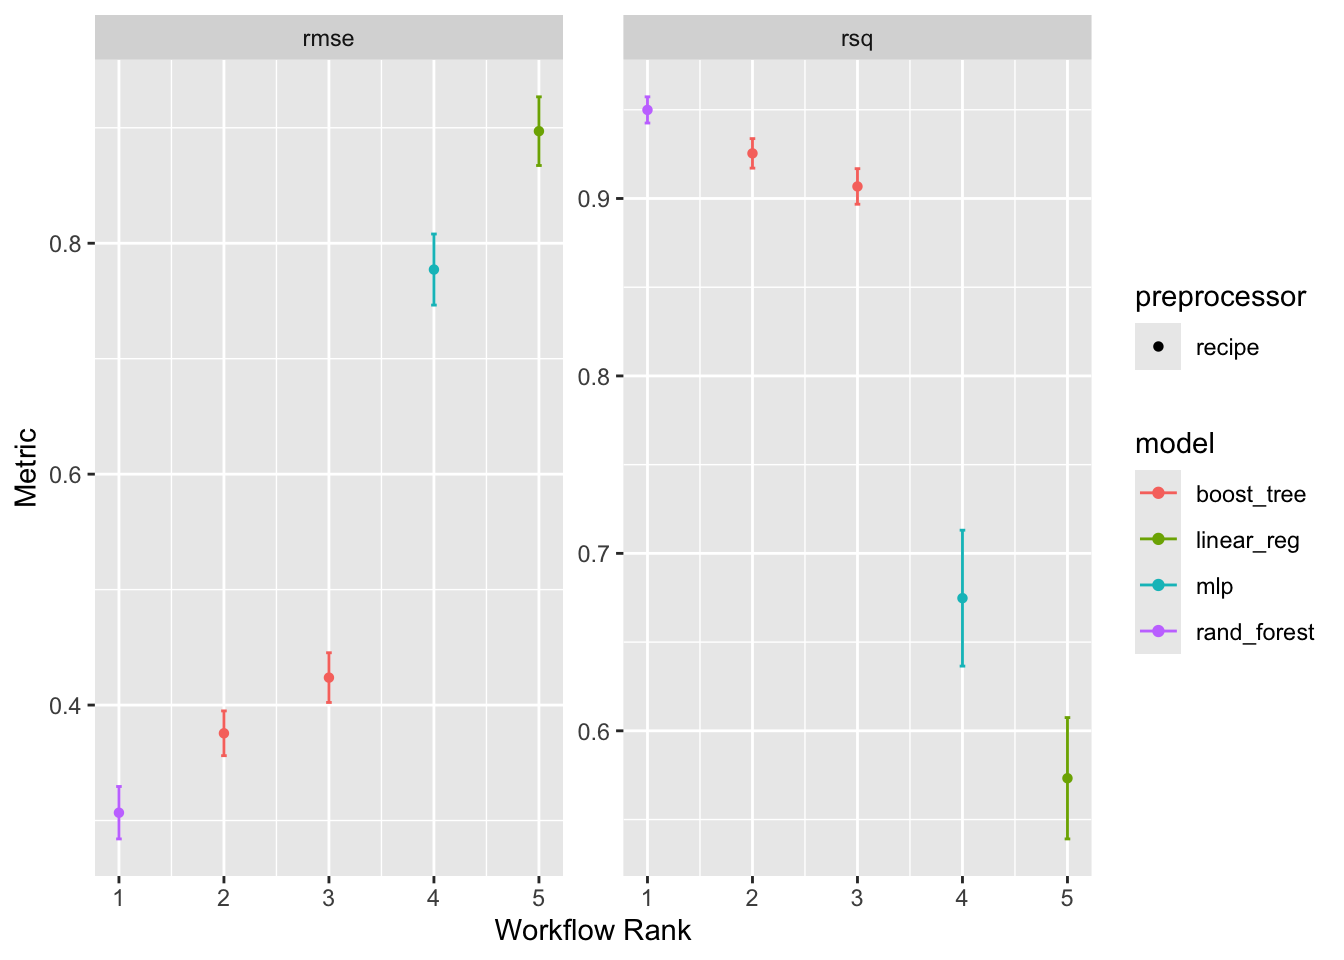

# A tibble: 5 × 9
  wflow_id          .config preproc model .metric .estimator  mean     n std_err
  <chr>             <chr>   <chr>   <chr> <chr>   <chr>      <dbl> <int>   <dbl>
1 recipe_linear_reg Prepro… recipe  line… rsq     standard   0.573    10 0.0208 
2 recipe_xgboost    Prepro… recipe  boos… rsq     standard   0.907    10 0.00609
3 recipe_lightgbm   Prepro… recipe  boos… rsq     standard   0.925    10 0.00506
4 recipe_mlp        Prepro… recipe  mlp   rsq     standard   0.675    10 0.0233 
5 recipe_rand_fore… Prepro… recipe  rand… rsq     standard   0.950    10 0.00449

In [ ]:
library(bonsai)  # Needed for using lightgbm in tidymodels

# Build a recipe to preprocess the data (drop unwanted columns)
rec = recipe(sl_forb_mid_585 ~ ., data = training) |> 
  step_rm(sl_grass_mid_585, ID) |> 
  step_normalize(all_predictors())

# Create a workflow set: recipe + all models
wf = workflow_set(list(rec),
                  list(lm_mod, 
                       xgboost = b_mod, 
                       lightgbm = b_mod2, 
                       nn_mod, 
                       rf_mod))  |> 
  workflow_map(resamples = folds)

# Visualize workflow performance
autoplot(wf)

want to move forward with random forest model because it has the lowest root mean sqaured error and highest r-sqaured value.

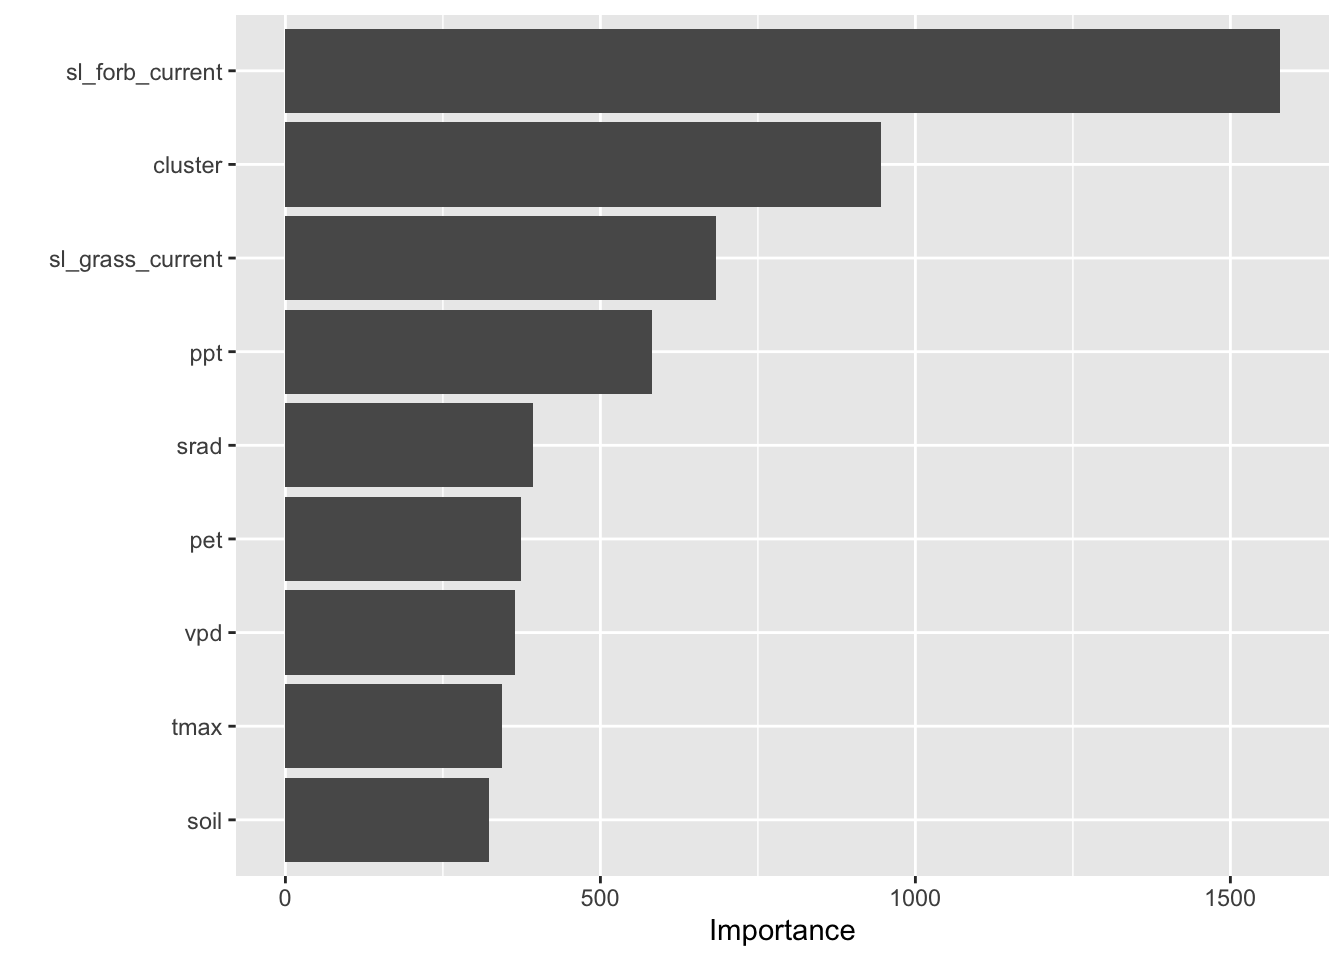

i Creating pre-processing data to finalize unknown parameter: mtry

# A tibble: 5 × 9
   mtry trees min_n .metric .estimator  mean     n std_err .config              
  <int> <int> <int> <chr>   <chr>      <dbl> <int>   <dbl> <chr>                
1     6  1167     2 rsq     standard   0.953    10 0.00432 Preprocessor1_Model17
2     3   667     3 rsq     standard   0.953    10 0.00441 Preprocessor1_Model08
3     7   417     6 rsq     standard   0.948    10 0.00464 Preprocessor1_Model20
4     2  1416     5 rsq     standard   0.947    10 0.00525 Preprocessor1_Model06
5     5  1833     8 rsq     standard   0.946    10 0.00464 Preprocessor1_Model13

# Resampling results
# Manual resampling 
# A tibble: 1 × 6
  splits             id               .metrics .notes   .predictions .workflow 
  <list>             <chr>            <list>   <list>   <list>       <list>    
1 <split [2973/992]> train/test split <tibble> <tibble> <tibble>     <workflow>

# A tibble: 2 × 4
  .metric .estimator .estimate .config             
  <chr>   <chr>          <dbl> <chr>               
1 rmse    standard       0.224 Preprocessor1_Model1
2 rsq     standard       0.972 Preprocessor1_Model1

`geom_smooth()` using formula = 'y ~ x'

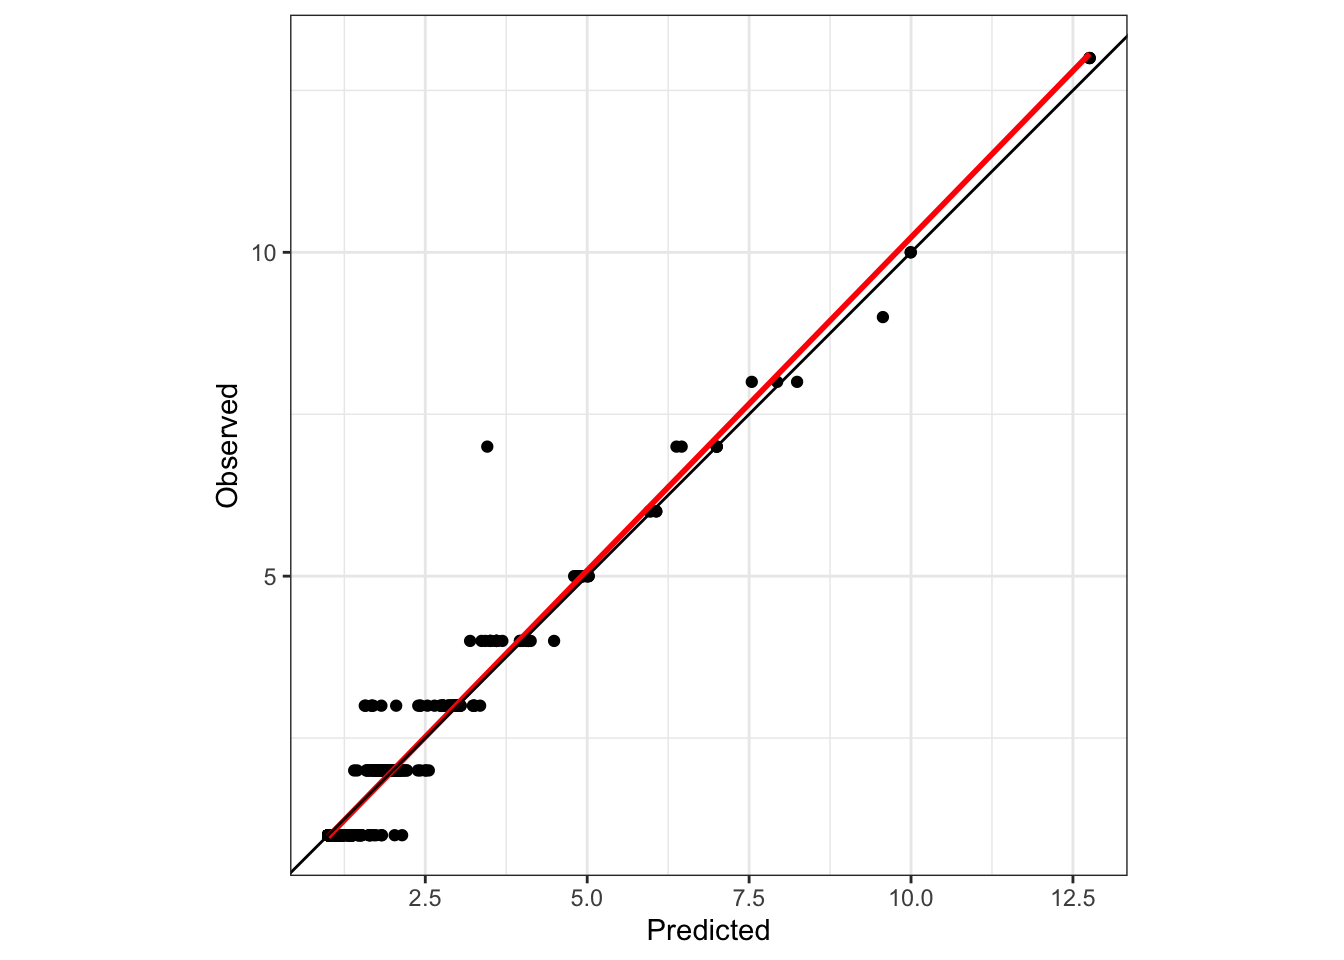

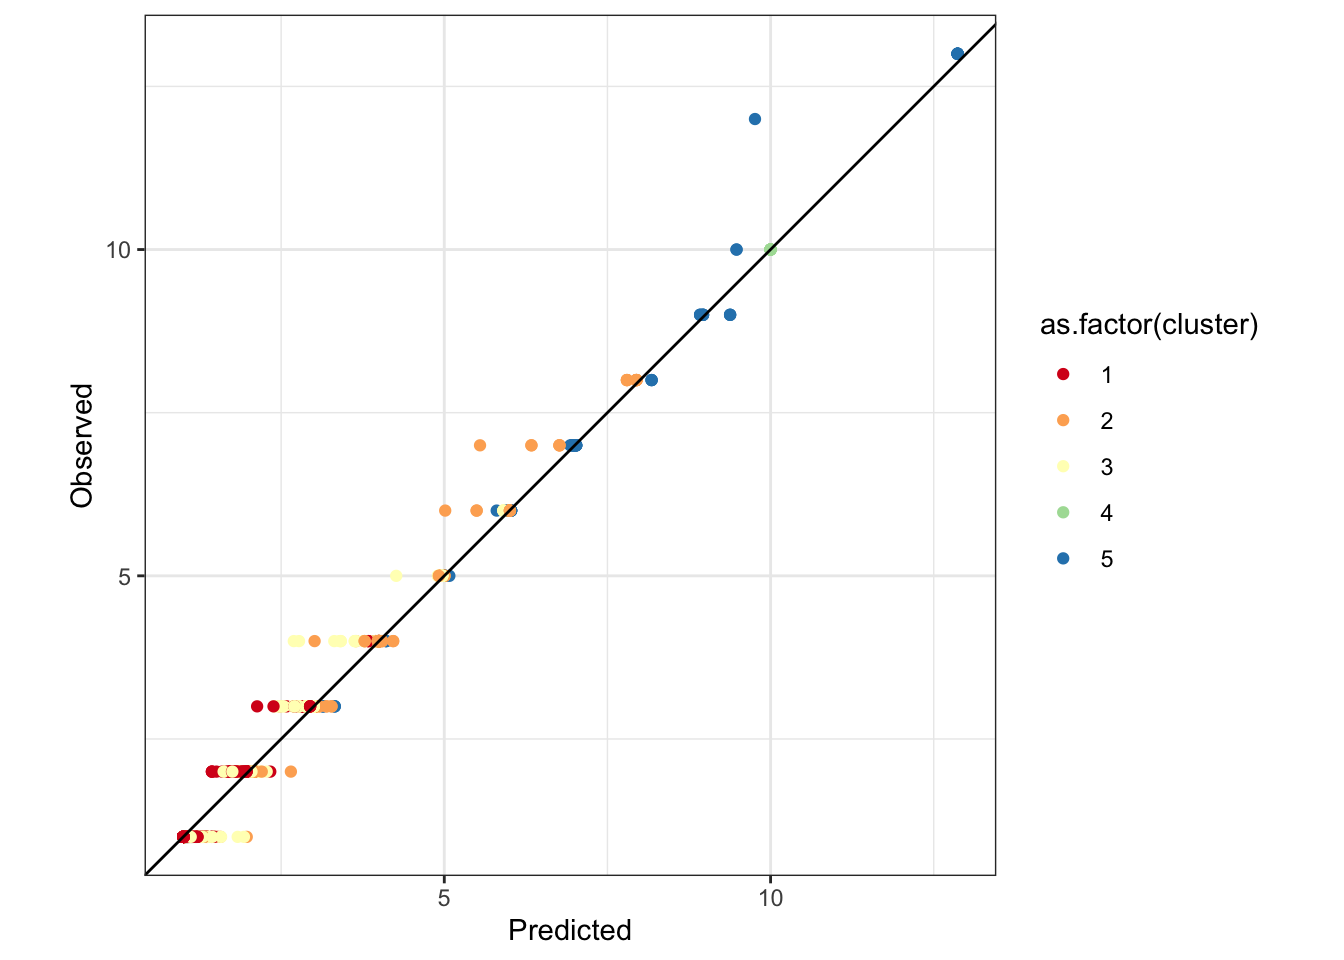

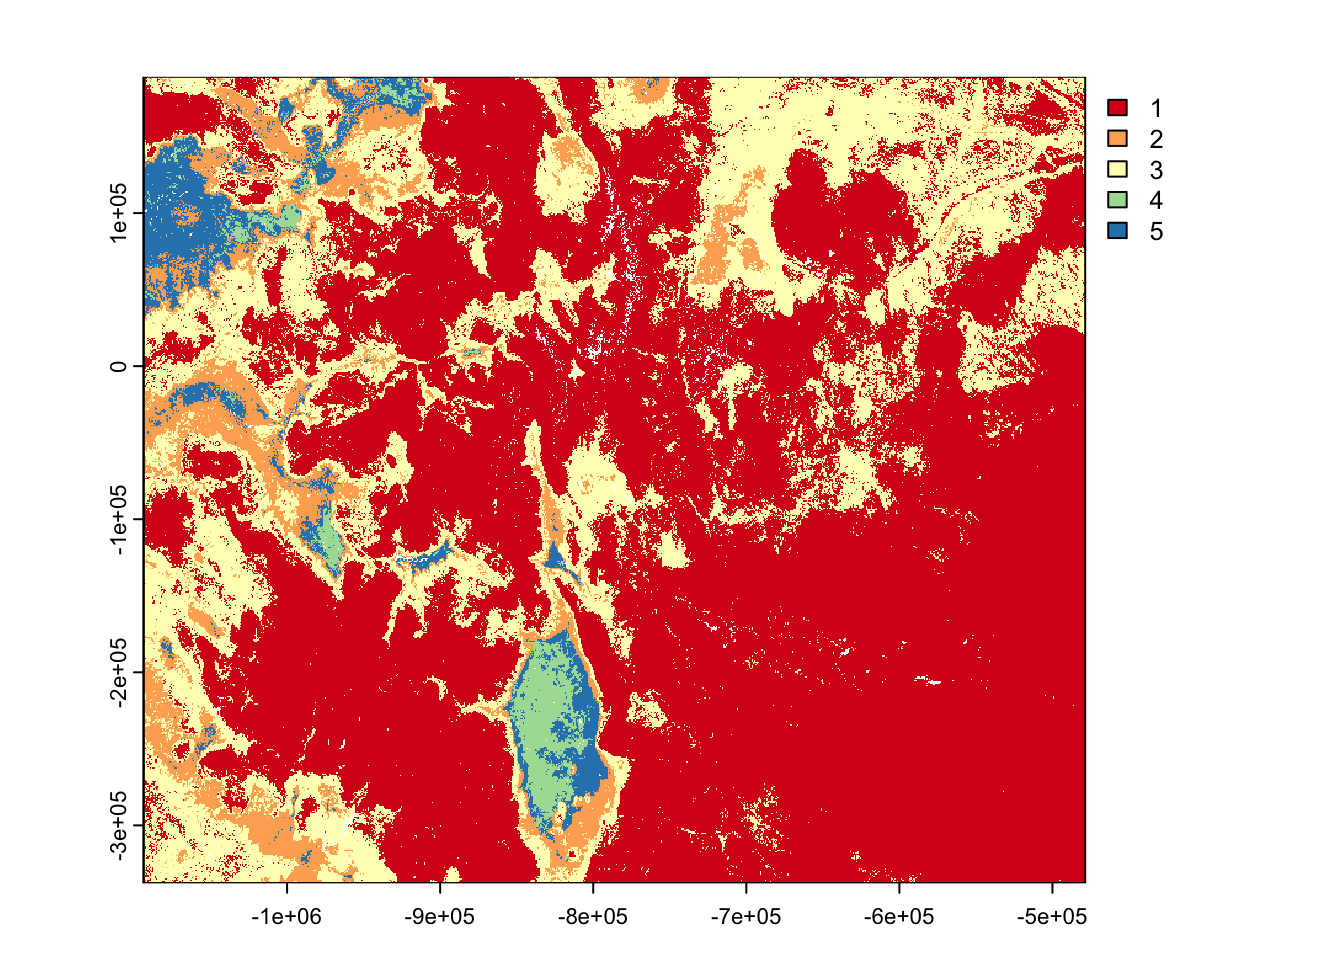

In [ ]:
# Focus on random forest (rf_mod) for tuning


# Build a single workflow with random forest model
wf = workflow() |> 
  add_recipe(rec) |> 
  add_model(rf_mod) 

# Fit the random forest to training data
wf_f = wf |> 
  fit(data = training) 

# Visualize feature importance (tells you which feature/variable was most important in making predictions)
vip::vip(wf_f)